In [1]:
import numpy 
from tensorflow import keras
from keras.constraints import maxnorm
#install package from conda-forge
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential , load_model
from keras.layers import Conv2D , MaxPool2D , Dense , Dropout , Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#load images from cifar10 dataset
# x : original image
# y : label of image
(x_train , y_train) , (x_test , y_test) = cifar10.load_data()

In [3]:
num_class = y_test.shape[1] #10 
# x_train.shape
# (5000 , 32 ,32 , 3) 32 px * 32 px and 3 for RGB channel
# x_test.shape
# show image :
# plt.imshow(x_train[0])


In [4]:
# normalize the input from 0 - 255 to 0  - 1 by dividing by 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0

x_test = x_test / 255.0

In [5]:
#one-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#before this : y_train[0] : [6]
#after this : y_train[0] : [0 , 0, 0, 0, ,0 , 0 ,1 , 0  , 0 ,0 ]

In [6]:
# convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))



Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-08-19 13:23:13.524900: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-19 13:23:13.525525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
#input layer for neural network :
model.add(Dense(32 , activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#output layer :
model.add(Dense(10 , activation='softmax'))

In [8]:
#compile model :
#if we have more than 2 categories  :
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

#else : loss='binary_crossentropy'

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [9]:
#training the model:
history = model.fit(x_train , y_train , validation_data=(x_test , y_test) , batch_size=64,epochs=20 )

Epoch 1/20


2022-08-19 13:23:14.652239: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-19 13:23:15.284993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.4505 - accuracy: 0.4871

2022-08-19 13:23:56.132385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 43s 54ms/step - loss: 1.4505 - accuracy: 0.4871 - val_loss: 1.2605 - val_accuracy: 0.5557
Epoch 2/20
782/782 [==============================] - 42s 54ms/step - loss: 0.9804 - accuracy: 0.6596 - val_loss: 0.9205 - val_accuracy: 0.6764
Epoch 3/20
782/782 [==============================] - 43s 55ms/step - loss: 0.8269 - accuracy: 0.7147 - val_loss: 0.9211 - val_accuracy: 0.6756
Epoch 4/20
782/782 [==============================] - 43s 55ms/step - loss: 0.7346 - accuracy: 0.7450 - val_loss: 0.8118 - val_accuracy: 0.7184
Epoch 5/20
782/782 [==============================] - 43s 55ms/step - loss: 0.6686 - accuracy: 0.7684 - val_loss: 0.6893 - val_accuracy: 0.7583
Epoch 6/20
782/782 [==============================] - 43s 55ms/step - loss: 0.6152 - accuracy: 0.7874 - val_loss: 0.9015 - val_accuracy: 0.6890
Epoch 7/20
782/782 [==============================] - 43s 55ms/step - loss: 0.5704 - accuracy: 0.8015 - val_loss: 0.6845 - val_accuracy: 0.7677
Epo

<AxesSubplot:>

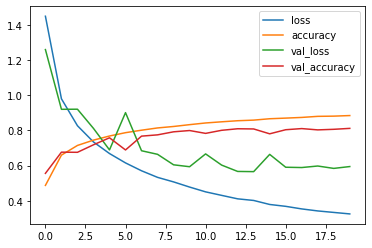

In [10]:
# show loss , accuracy , val_loss , val_accuracy
# for key , value in history.history.items():
#     print(key)
pd.DataFrame(history.history).plot()
# overfitting : when model just memorizes the data and doesnt learn them
# loss is decreasing but val_loss in increase
# how can we solve overfitting ?
# 1. adding more data ( data augmentation )
# 2. using dropout



In [11]:
# save model :
model.save('CNN-cifar10.h1')
# use it on other noteboook :
new_model = load_model('CNN-cifar10.h1')


INFO:tensorflow:Assets written to: CNN-cifar10.h1/assets


INFO:tensorflow:Assets written to: CNN-cifar10.h1/assets


In [12]:
# manual test on the model:
labels = ['airplane' , 'automobile' , 'bird','cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']
# print(new_model.predict(x_test[0:10]))
# print(labels[3])
# y_test[0]

 19/313 [>.............................] - ETA: 1s

2022-08-19 13:45:38.700879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step


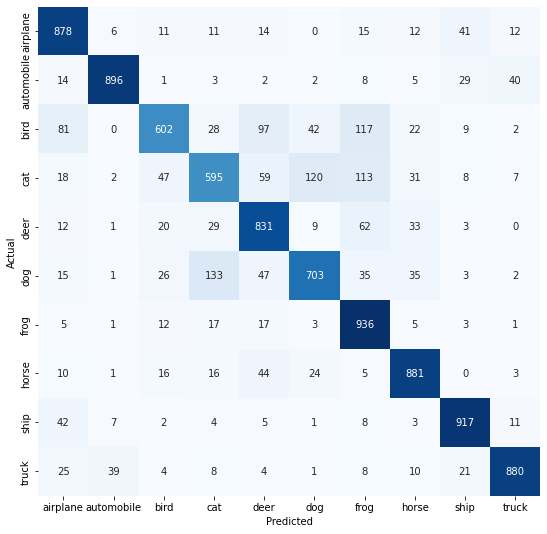

In [13]:
# Predicting test data
predictions = model.predict(x_test)

predictions = numpy.argmax(predictions, axis = 1)

y_test = numpy.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()